# Project: Gapminder Worldview; Human Development

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
    <ul><li><a href="#questions">Asking Qauestions</a></li></ul>
<li><a href="#wrangling">Data Wrangling</a></li>
    <ul>
    <li><a href="#gather">Gathering Data</a></li>
    <li><a href="#assess">Assessing Data</a></li>
    <li><a href="#clean">Cleaning Data</a></li>
    </ul>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## 1. Introduction
### 1.1. About the Data
The following datasets have been collected from [gapminder](https://www.gapminder.org/data/):
- GDP per capita, PPP. <a href='https://github.com/Gapminder-Indicators/gdppc_cppp/raw/master/gdppc_cppp-by-gapminder.xlsx'>here</a>
- Life expectancy <a href='https://github.com/Gapminder-Indicators/lex/blob/master/lex-by-gapminder.xlsx'>here</a>
- Education index <a href='http://gapm.io/deducation_idx'>here</a>

### 1.2. Attribution
- License: CC BY-4: Creative Common Attribution Licence 4.0
- Attribution: Free data from www.gapminder.org
- License link: www.gapm.io/data_license

### 1.3. Datasets
Three datasets have been selected to reflect three basic dimensions of human development in a country:
- **Economical Indicator**: The standard of living is measured by the Gross Domestic Product per Capita **(GDPpC)** in purchasing power parity (PPP) terms in US dollars.
- **Health Indicator**: the Life Expectancy **(lex)** is a clear indicator of human welfare and medical advancancement of a country.
- **Social Indicator**: Literacy Rate, that is used to calculate the Education Index **(EDI)** is a reflection on human welfare and country development


### 1.4. Walkthrough
- A fourth dataset is included listing geographical information for each country to be used for analysis, including:
    - geographical region (6 regions)
    - income group (4 groups) as categorized by the World Bank in 2017
- Data provided will be cropped to measure key matrices over the past century (1900-2017)
- The three datasets will be combined based on a key index which is the country name
- These three indicators will then be used to calculate a key metric for country development which is the **Human Development Index (HDI)** for further analysis.

<a id='questions'></a>
### 1.5. Asking Questions
Data analysis will be done to answer the following main questions:
- What is the GDPpC associated with each of the four income groups?
- Is there a strong correlation between economical growth and human welfare?
- Have certain regions of the world been growing during the past century better than others?
- Is there a key indicator that reflects on human development?

<a id='wrangling'></a>
## 2. Data Wrangling

In [1]:
#importing required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='gather'></a>
### 2.1. Gathering Data

> Four datasets were downloaded from the above mentioned source, and then saved into `csv` files

In [2]:
#loading csv files into pandas dataframe

countries_df = pd.read_csv('world_countries.csv')
economy_df = pd.read_csv('gdppc_cppp_countries.csv')
health_df = pd.read_csv('lex_countries.csv')
edu_df = pd.read_csv('ed_idx_countries.csv')

<a id='assess'></a>
### 2.2. Assessing Data

#### 2.2.1. Visual Assessment

##### `countries` table
> lists the names of geographic areas often used in analyzing global development. It contains a listing of **197 countries** in the world, along with some descriptive information that will be used to group and analyze data. The following columns will be used later, whereas other columns are irrelevant and shall be dropped.

> `countries` columns:
> - **name**: country name
> - **six_regions**: europe_central_asia, sub_saharan_africa, america, east_asia_pacific, middle_east_north_africa, south_asia
> - **World bank, 4 income groups 2017**: High income, Upper middle income, Lower middle income, Low income

In [3]:
countries_df

,geo,name,four_regions,eight_regions,six_regions,members_oecd_g77,Latitude,Longitude,UN member since,World bank region,"World bank, 4 income groups 2017","World bank, 3 income groups 2017"
0,afg,Afghanistan,asia,asia_west,south_asia,g77,33.00000,66.00000,19/11/1946,South Asia,Low income,NaN
1,alb,Albania,europe,europe_east,europe_central_asia,others,41.00000,20.00000,14/12/1955,Europe & Central Asia,Upper middle income,NaN
2,dza,Algeria,africa,africa_north,middle_east_north_africa,g77,28.00000,3.00000,8/10/1962,Middle East & North Africa,Upper middle income,NaN
3,and,Andorra,europe,europe_west,europe_central_asia,others,42.50779,1.52109,28/7/1993,Europe & Central Asia,High income,NaN
4,ago,Angola,africa,africa_sub_saharan,sub_saharan_africa,g77,-12.50000,18.50000,1/12/1976,Sub-Saharan Africa,Lower middle income,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
192,vnm,Vietnam,asia,east_asia_pacific,east_asia_pacific,g77,16.16667,107.83333,20/9/1977,East Asia & Pacific,Lower middle income,NaN
193,yem,Yemen,asia,asia_west,middle_east_north_africa,g77,15.50000,47.50000,30/9/1947,Middle East & North Africa,Lower middle income,NaN
194,zmb,Zambia,africa,africa_sub_saharan,sub_saharan_africa,g77,-14.33333,28.50000,1/12/1964,Sub-Saharan Africa,Lower middle income,NaN
195,zwe,Zimbabwe,africa,africa_sub_saharan,sub_saharan_africa,g77,-19.00000,29.75000,25/8/1980,Sub-Saharan Africa,Low income,NaN


##### `economy` table
> lists measures of _GDP per capita_ indicator over the years 1800 to 2040. <br>
**GDP** Gross Domestic Product <br>
**PPP** Purchasing Power Parity <br>
**GDP per Capita** measures the value of everything produced in a country during a year, divided by the number of people. <br>
The unit is in international dollars, fixed 2011 prices. <br>
The data is adjusted for inflation (2011 dollar-value) and differences in the cost of living between countries, so-called PPP dollars. 

> `economy` columns:
> - **geo.name**: country name (Key)

In [4]:
economy_df

,geo.name,indicator.name,geo,indicator,1800,1801,1802,1803,1804,1805,...,2031,2032,2033,2034,2035,2036,2037,2038,2039,2040
0,Abkhazia,"GDP per capita, PPP (constant 2011 internation...",abkh,gdppc_cppp,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,"GDP per capita, PPP (constant 2011 internation...",afg,gdppc_cppp,603.0,603.0,603.0,603.0,603.0,603.0,...,2416.0,2469.0,2524.0,2580.0,2637.0,2695.0,2755.0,2816.0,2878.0,2942.0
2,Akrotiri and Dhekelia,"GDP per capita, PPP (constant 2011 internation...",akr_a_dhe,gdppc_cppp,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,"GDP per capita, PPP (constant 2011 internation...",alb,gdppc_cppp,667.0,667.0,667.0,667.0,667.0,668.0,...,18471.0,18881.0,19299.0,19727.0,20164.0,20611.0,21068.0,21535.0,22012.0,22500.0
4,Algeria,"GDP per capita, PPP (constant 2011 internation...",dza,gdppc_cppp,715.0,716.0,717.0,718.0,719.0,720.0,...,15603.0,15948.0,16301.0,16662.0,17031.0,17408.0,17794.0,18188.0,18591.0,19003.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270,Northern Marianas,"GDP per capita, PPP (constant 2011 internation...",n_marianas,gdppc_cppp,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
271,South Georgia and the South Sandwich Islands,"GDP per capita, PPP (constant 2011 internation...",sgero_a_ssandw,gdppc_cppp,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
272,US Minor Outlying Islands,"GDP per capita, PPP (constant 2011 internation...",usa_minor_out_isl,gdppc_cppp,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
273,Virgin Islands,"GDP per capita, PPP (constant 2011 internation...",virg_isl,gdppc_cppp,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


##### `health` table
> lists measures of _life expectancy_ indicator over the years 1800 to 2100. <br>
**Life Expectancy** the average number of years a newborn child would live if current mortality rates were to stay the same<br>
The unit is in years

> `health` columns:
> - **geo.name**: country name (Key)

In [5]:
health_df

,geo.name,indicator.name,geo,indicator,1800,1801,1802,1803,1804,1805,...,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100
0,Abkhazia,Life expectancy,abkh,lex,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,Life expectancy,afg,lex,28.21,28.20,28.19,28.18,28.17,28.16,...,69.95,70.07,70.19,70.31,70.44,70.57,70.70,70.83,70.96,71.09
2,Akrotiri and Dhekelia,Life expectancy,akr_a_dhe,lex,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,Life expectancy,alb,lex,35.40,35.40,35.40,35.40,35.40,35.40,...,88.29,88.40,88.51,88.62,88.73,88.84,88.95,89.06,89.17,89.28
4,Algeria,Life expectancy,dza,lex,28.82,28.82,28.82,28.82,28.82,28.82,...,89.37,89.49,89.61,89.73,89.85,89.97,90.09,90.21,90.33,90.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270,Northern Marianas,Life expectancy,n_marianas,lex,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
271,South Georgia and the South Sandwich Islands,Life expectancy,sgero_a_ssandw,lex,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
272,US Minor Outlying Islands,Life expectancy,usa_minor_out_isl,lex,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
273,Virgin Islands,Life expectancy,virg_isl,lex,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


##### `education` table
> lists measures of _**education index**_ indicator for 187 countries from 1870 to 2017 <br>
**education index** is a measure of people literacy using the average years of schooling for youth and adults <br>
Returns a value from 0 to 1

> `education` columns:
> - **country**: country name (Key)

In [6]:
edu_df

,country,1870,1871,1872,1873,1874,1875,1876,1877,1878,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Afghanistan,0.000667,NaN,NaN,NaN,NaN,0.000667,NaN,NaN,NaN,...,0.200,0.207,0.213,0.220,0.227,0.233,0.233,0.240,0.240,0.253
1,Albania,0.001330,NaN,NaN,NaN,NaN,0.001330,NaN,NaN,NaN,...,0.613,0.620,0.620,0.620,0.640,0.647,0.647,0.647,0.667,0.667
2,Algeria,0.005330,NaN,NaN,NaN,NaN,0.006000,NaN,NaN,NaN,...,0.447,0.460,0.473,0.493,0.507,0.520,0.527,0.527,0.533,0.533
3,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.673,0.673,0.673,0.680,0.680,0.680,0.680,0.680,0.680,0.680
4,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.307,0.313,0.313,0.313,0.320,0.327,0.327,0.333,0.340,0.340
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182,Venezuela,0.000667,NaN,NaN,NaN,NaN,0.000667,NaN,NaN,NaN,...,0.547,0.553,0.593,0.653,0.647,0.660,0.667,0.673,0.673,0.687
183,Vietnam,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.467,0.533,0.500,0.507,0.520,0.527,0.520,0.533,0.540,0.547
184,Yemen,0.000667,NaN,NaN,NaN,NaN,0.000667,NaN,NaN,NaN,...,0.153,0.167,0.173,0.187,0.200,0.200,0.200,0.200,0.200,0.200
185,Zambia,0.000667,NaN,NaN,NaN,NaN,0.000667,NaN,NaN,NaN,...,0.433,0.433,0.440,0.447,0.447,0.453,0.460,0.460,0.467,0.467


#### 2.2.2. Programmatic Assessment

##### `countries`

In [7]:
countries_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197 entries, 0 to 196
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   geo                               197 non-null    object 
 1   name                              197 non-null    object 
 2   four_regions                      197 non-null    object 
 3   eight_regions                     197 non-null    object 
 4   six_regions                       197 non-null    object 
 5   members_oecd_g77                  196 non-null    object 
 6   Latitude                          197 non-null    float64
 7   Longitude                         197 non-null    float64
 8   UN member since                   193 non-null    object 
 9   World bank region                 196 non-null    object 
 10  World bank, 4 income groups 2017  196 non-null    object 
 11  World bank, 3 income groups 2017  0 non-null      float64
dtypes: float

In [8]:
countries_df.describe(include='all')

,geo,name,four_regions,eight_regions,six_regions,members_oecd_g77,Latitude,Longitude,UN member since,World bank region,"World bank, 4 income groups 2017","World bank, 3 income groups 2017"
count,197,197,197,197,197,196,197.000000,197.000000,193,196,196,0.0
unique,197,197,4,8,6,3,NaN,NaN,93,7,4,NaN
top,hti,Iran,asia,africa_sub_saharan,europe_central_asia,g77,NaN,NaN,24/10/1945,Europe & Central Asia,High income,NaN
freq,1,1,59,48,54,130,NaN,NaN,27,52,58,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,19.148015,22.950922,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,23.815829,66.874965,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,-42.000000,-175.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,4.000000,-5.500000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,17.499520,21.750000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,40.000000,51.522450,NaN,NaN,NaN,NaN


> [OK] Comparing Counts and Unique for the columns of interest shows that the table does not contain any duplicate values, and that the categorization is accurate

In [9]:
countries_df['six_regions'].value_counts()

europe_central_asia         54
sub_saharan_africa          48
america                     35
east_asia_pacific           32
middle_east_north_africa    20
south_asia                   8
Name: six_regions, dtype: int64

> [OK] The six region categorization is descriptive enough

In [10]:
countries_df['World bank, 4 income groups 2017'].value_counts()

High income            58
Upper middle income    55
Lower middle income    52
Low income             31
Name: World bank, 4 income groups 2017, dtype: int64

> [X] The four income group categorization is descriptive, but can be modified in a better way.

In [11]:
countries_df.isnull().sum()

geo                                   0
name                                  0
four_regions                          0
eight_regions                         0
six_regions                           0
members_oecd_g77                      1
Latitude                              0
Longitude                             0
UN member since                       4
World bank region                     1
World bank, 4 income groups 2017      1
World bank, 3 income groups 2017    197
dtype: int64

> [X] one missing value in (World bank, 4 income groups) column of interest

In [12]:
countries_df[countries_df['World bank, 4 income groups 2017'].isnull()]

,geo,name,four_regions,eight_regions,six_regions,members_oecd_g77,Latitude,Longitude,UN member since,World bank region,"World bank, 4 income groups 2017","World bank, 3 income groups 2017"
72,hos,Holy See,europe,europe_west,europe_central_asia,others,41.90236,12.45332,NaN,NaN,NaN,NaN


##### `economy`

In [13]:
economy_df.describe(include='all')

,geo.name,indicator.name,geo,indicator,1800,1801,1802,1803,1804,1805,...,2031,2032,2033,2034,2035,2036,2037,2038,2039,2040
count,275,275,275,275,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,...,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000
unique,275,1,275,1,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Iran,"GDP per capita, PPP (constant 2011 internation...",sgero_a_ssandw,gdppc_cppp,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,275,1,275,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,946.732673,947.168317,949.995050,949.772277,951.341584,951.826733,...,25167.251232,25724.689655,26294.517241,26876.950739,27472.330049,28080.935961,28703.014778,29338.862069,29988.822660,30653.192118
std,NaN,NaN,NaN,NaN,500.811717,498.986138,508.776197,503.665329,510.793507,505.607644,...,25747.217348,26317.337412,26900.263825,27496.182261,28105.324346,28727.927846,29364.324210,30014.802400,30679.682703,31359.324414
min,NaN,NaN,NaN,NaN,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,...,718.000000,734.000000,750.000000,767.000000,784.000000,801.000000,819.000000,837.000000,856.000000,875.000000
25%,NaN,NaN,NaN,NaN,610.500000,611.000000,611.250000,612.000000,612.000000,612.000000,...,5427.000000,5547.000000,5670.000000,5795.500000,5924.000000,6055.500000,6190.000000,6327.500000,6468.000000,6611.500000
50%,NaN,NaN,NaN,NaN,850.500000,852.500000,853.500000,854.000000,854.000000,854.000000,...,16760.000000,17132.000000,17512.000000,17900.000000,18297.000000,18702.000000,19116.000000,19539.000000,19972.000000,20414.000000
75%,NaN,NaN,NaN,NaN,1097.000000,1101.000000,1105.000000,1109.750000,1114.000000,1118.000000,...,38116.000000,38960.500000,39824.000000,40706.000000,41608.000000,42530.000000,43472.000000,44435.000000,45419.500000,46426.000000


In [14]:
economy_df.isnull().sum()

geo.name           0
indicator.name     0
geo                0
indicator          0
1800              73
                  ..
2036              72
2037              72
2038              72
2039              72
2040              72
Length: 245, dtype: int64

In [15]:
economy_df.isnull().sum().sum()

17541

In [16]:
economy_df[economy_df.isnull().any(axis=1)]

,geo.name,indicator.name,geo,indicator,1800,1801,1802,1803,1804,1805,...,2031,2032,2033,2034,2035,2036,2037,2038,2039,2040
0,Abkhazia,"GDP per capita, PPP (constant 2011 internation...",abkh,gdppc_cppp,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Akrotiri and Dhekelia,"GDP per capita, PPP (constant 2011 internation...",akr_a_dhe,gdppc_cppp,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,American Samoa,"GDP per capita, PPP (constant 2011 internation...",asm,gdppc_cppp,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Anguilla,"GDP per capita, PPP (constant 2011 internation...",aia,gdppc_cppp,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30,British Virgin Islands,"GDP per capita, PPP (constant 2011 internation...",vgb,gdppc_cppp,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270,Northern Marianas,"GDP per capita, PPP (constant 2011 internation...",n_marianas,gdppc_cppp,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
271,South Georgia and the South Sandwich Islands,"GDP per capita, PPP (constant 2011 internation...",sgero_a_ssandw,gdppc_cppp,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
272,US Minor Outlying Islands,"GDP per capita, PPP (constant 2011 internation...",usa_minor_out_isl,gdppc_cppp,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
273,Virgin Islands,"GDP per capita, PPP (constant 2011 internation...",virg_isl,gdppc_cppp,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


##### `health`

In [17]:
health_df.describe(include='all')

,geo.name,indicator.name,geo,indicator,1800,1801,1802,1803,1804,1805,...,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100
count,275,275,275,275,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,...,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000
unique,275,1,275,1,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Iran,Life expectancy,sgero_a_ssandw,lex,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,275,1,275,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,31.486020,31.448905,31.463483,31.377413,31.446318,31.562537,...,84.681256,84.804774,84.928191,85.050905,85.172915,85.294724,85.416181,85.537337,85.658141,85.778995
std,NaN,NaN,NaN,NaN,3.763585,3.755739,3.878204,3.901966,3.877156,3.947957,...,5.588609,5.582047,5.575633,5.569173,5.562837,5.556570,5.550165,5.544156,5.538178,5.532203
min,NaN,NaN,NaN,NaN,23.390000,23.390000,23.390000,19.600000,23.390000,23.390000,...,69.070000,69.180000,69.290000,69.400000,69.510000,69.620000,69.740000,69.850000,69.970000,70.090000
25%,NaN,NaN,NaN,NaN,29.000000,28.950000,28.900000,28.900000,28.950000,29.000000,...,80.380000,80.530000,80.680000,80.830000,80.980000,81.120000,81.255000,81.395000,81.535000,81.675000
50%,NaN,NaN,NaN,NaN,31.800000,31.700000,31.600000,31.500000,31.600000,31.700000,...,85.450000,85.580000,85.690000,85.800000,85.910000,86.020000,86.130000,86.240000,86.340000,86.450000
75%,NaN,NaN,NaN,NaN,33.900000,33.900000,33.900000,33.800000,33.870000,33.900000,...,89.595000,89.715000,89.830000,89.945000,90.060000,90.175000,90.295000,90.415000,90.540000,90.665000


In [18]:
health_df.isnull().sum()

geo.name           0
indicator.name     0
geo                0
indicator          0
1800              74
                  ..
2096              76
2097              76
2098              76
2099              76
2100              76
Length: 305, dtype: int64

In [19]:
health_df.isnull().sum().sum()

22087

In [20]:
health_df[health_df.isnull().any(axis=1)]

,geo.name,indicator.name,geo,indicator,1800,1801,1802,1803,1804,1805,...,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100
0,Abkhazia,Life expectancy,abkh,lex,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Akrotiri and Dhekelia,Life expectancy,akr_a_dhe,lex,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,American Samoa,Life expectancy,asm,lex,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Andorra,Life expectancy,and,lex,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Anguilla,Life expectancy,aia,lex,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270,Northern Marianas,Life expectancy,n_marianas,lex,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
271,South Georgia and the South Sandwich Islands,Life expectancy,sgero_a_ssandw,lex,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
272,US Minor Outlying Islands,Life expectancy,usa_minor_out_isl,lex,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
273,Virgin Islands,Life expectancy,virg_isl,lex,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


##### `education`

In [21]:
edu_df.describe(include='all')

,country,1870,1871,1872,1873,1874,1875,1876,1877,1878,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
count,187,108.000000,0.0,0.0,0.0,0.0,108.000000,0.0,0.0,0.0,...,183.000000,183.000000,184.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000
unique,187,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Iran,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,0.033347,NaN,NaN,NaN,NaN,0.035648,NaN,NaN,NaN,...,0.518541,0.524654,0.531563,0.539402,0.545780,0.552239,0.558180,0.562629,0.567524,0.569330
std,NaN,0.063791,NaN,NaN,NaN,NaN,0.066038,NaN,NaN,NaN,...,0.211332,0.211350,0.210641,0.209962,0.208275,0.207641,0.207443,0.207601,0.207277,0.206416
min,NaN,0.000000,NaN,NaN,NaN,NaN,0.000667,NaN,NaN,NaN,...,0.086700,0.093300,0.093300,0.093300,0.093300,0.093300,0.093300,0.093300,0.100000,0.100000
25%,NaN,0.000667,NaN,NaN,NaN,NaN,0.000667,NaN,NaN,NaN,...,0.343500,0.347000,0.358250,0.367000,0.367000,0.387000,0.400000,0.407000,0.413000,0.420000
50%,NaN,0.003665,NaN,NaN,NaN,NaN,0.004665,NaN,NaN,NaN,...,0.533000,0.533000,0.540000,0.560000,0.567000,0.567000,0.573000,0.587000,0.593000,0.593000
75%,NaN,0.024475,NaN,NaN,NaN,NaN,0.030825,NaN,NaN,NaN,...,0.696500,0.707000,0.713000,0.720000,0.720000,0.727000,0.727000,0.740000,0.740000,0.740000


In [22]:
edu_df.isnull().sum()

country      0
1870        79
1871       187
1872       187
1873       187
          ... 
2013         2
2014         2
2015         2
2016         2
2017         2
Length: 149, dtype: int64

In [23]:
edu_df.isnull().sum().sum()

20087

In [24]:
edu_df[edu_df.isnull().any(axis=1)]

,country,1870,1871,1872,1873,1874,1875,1876,1877,1878,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Afghanistan,0.000667,NaN,NaN,NaN,NaN,0.000667,NaN,NaN,NaN,...,0.200,0.207,0.213,0.220,0.227,0.233,0.233,0.240,0.240,0.253
1,Albania,0.001330,NaN,NaN,NaN,NaN,0.001330,NaN,NaN,NaN,...,0.613,0.620,0.620,0.620,0.640,0.647,0.647,0.647,0.667,0.667
2,Algeria,0.005330,NaN,NaN,NaN,NaN,0.006000,NaN,NaN,NaN,...,0.447,0.460,0.473,0.493,0.507,0.520,0.527,0.527,0.533,0.533
3,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.673,0.673,0.673,0.680,0.680,0.680,0.680,0.680,0.680,0.680
4,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.307,0.313,0.313,0.313,0.320,0.327,0.327,0.333,0.340,0.340
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182,Venezuela,0.000667,NaN,NaN,NaN,NaN,0.000667,NaN,NaN,NaN,...,0.547,0.553,0.593,0.653,0.647,0.660,0.667,0.673,0.673,0.687
183,Vietnam,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.467,0.533,0.500,0.507,0.520,0.527,0.520,0.533,0.540,0.547
184,Yemen,0.000667,NaN,NaN,NaN,NaN,0.000667,NaN,NaN,NaN,...,0.153,0.167,0.173,0.187,0.200,0.200,0.200,0.200,0.200,0.200
185,Zambia,0.000667,NaN,NaN,NaN,NaN,0.000667,NaN,NaN,NaN,...,0.433,0.433,0.440,0.447,0.447,0.453,0.460,0.460,0.467,0.467


#### 2.2.3. Documenting Data Issues

##### 2.2.3.1. Quality
- ###### `countries` table
 - 1 NaN value in (`World Bank 4 income group`) column for "Holy See" Country
 - undescriptive column names for country (`name`, `six_region`, `World Bank 4 income group`)
 - Long names for the income categories of the (`World Bank 4 income group`)
- ###### `economy` table
 - 73 rows with Null data
 - undescriptive column names for country (`geo.name`)
- ###### `health` table
 - 77 rows with Null data
 - undescriptive column names for country (`geo.name`)
- ###### `education` table
 - all countries have NaN values
 - some years do not have any data

##### 2.2.3.2. Tidiness
- Unwanted columns in all tables
- Empty columns in `education` table
- variables in all tables are spread over many columns for the same indicator
- inconsistent key column label (`country`) over the tables

<a id='clean'></a>
### 2.3. Data Cleaning

Copies of the dataframes should be created, on which all cleaning processes shall be carried out

In [25]:
countries_clean = countries_df.copy()
economy_clean = economy_df.copy()
health_clean = health_df.copy()
edu_clean = edu_df.copy()

#### 2.3.1. Drop Extraneous Columns

- `Drop` unwanted columns across tables
- `Drop` any data outside the period of interest (1900 - 2017)

##### `countries`

In [26]:
# list all column names
list(countries_clean)

['geo',
 'name',
 'four_regions',
 'eight_regions',
 'six_regions',
 'members_oecd_g77',
 'Latitude',
 'Longitude',
 'UN member since',
 'World bank region',
 'World bank, 4 income groups 2017',
 'World bank, 3 income groups 2017']

In [27]:
# drop unwanted columns across the column (1) axis, in place
countries_clean.drop(['geo', 'four_regions', 'eight_regions', 'members_oecd_g77', 'Latitude', 'Longitude',
                      'UN member since', 'World bank region', 'World bank, 3 income groups 2017'], axis=1, inplace=True)

In [28]:
# confirm changes
countries_clean.sample()

,name,six_regions,"World bank, 4 income groups 2017"
171,Tajikistan,europe_central_asia,Lower middle income


##### `economy`

In [29]:
# list column names
list(economy_clean)[:5]

['geo.name', 'indicator.name', 'geo', 'indicator', '1800']

In [30]:
# drop unwanted columns
economy_clean.drop(['indicator.name','indicator','geo'], axis=1, inplace=True)

In [31]:
# drop values for years after 2017
economy_clean.drop(economy_clean.columns[-23:], axis=1, inplace=True)

In [32]:
# Drop values for years before 1900
economy_clean.drop(economy_clean.columns[1:101], axis=1, inplace=True)

In [33]:
# confirm changes
economy_clean.sample()

,geo.name,1900,1901,1902,1903,1904,1905,1906,1907,1908,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
90,Guatemala,1648.0,1661.0,1675.0,1688.0,1702.0,1716.0,1730.0,1744.0,1758.0,...,6782.0,6670.0,6714.0,6844.0,6899.0,7005.0,7147.0,7293.0,7367.0,7439.0


##### `health`

In [34]:
list(health_clean)[:5]

['geo.name', 'indicator.name', 'geo', 'indicator', '1800']

In [35]:
# drop unwanted columns
health_clean.drop(['indicator.name','indicator','geo'], axis=1, inplace=True)

In [36]:
# drop values for years after 2017
health_clean.drop(health_clean.columns[-83:], axis=1, inplace=True)

In [37]:
# drop values for years before 1900
health_clean.drop(health_clean.columns[1:101], axis=1, inplace=True)

In [38]:
# confirm changes
health_clean.sample()

,geo.name,1900,1901,1902,1903,1904,1905,1906,1907,1908,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
117,South Korea,25.9,25.91,25.91,25.91,25.45,25.0,24.54,24.09,23.63,...,79.55,79.87,80.13,80.42,80.64,80.87,80.91,80.94,80.94,81.15


##### `education`

In [39]:
# drop values for years before 1900
edu_clean.drop(edu_clean.columns[1:31], axis=1, inplace=True)

In [40]:
# confirm changes
edu_clean.sample()

,country,1900,1901,1902,1903,1904,1905,1906,1907,1908,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
160,Sudan,0.000667,NaN,NaN,NaN,NaN,0.00133,NaN,NaN,NaN,...,0.2,0.207,0.207,0.213,0.22,0.227,0.233,0.24,0.24,0.247


#### 2.3.2. Rename Columns

- `Rename` to unify (country name) columns across all tables
- `Rename` to correct undescriptive column names

##### `countries`

In [41]:
countries_clean.rename(columns={'name':'country', 'World bank, 4 income groups 2017':'income_group','six_regions':'region'}, inplace=True)

In [42]:
# confirm changes
countries_clean.sample()

,country,region,income_group
42,Croatia,europe_central_asia,Upper middle income


##### `economy`

In [43]:
economy_clean.rename(columns={'geo.name':'country'}, inplace=True)

In [44]:
# confirm changes
economy_clean.sample()

,country,1900,1901,1902,1903,1904,1905,1906,1907,1908,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
60,Djibouti,1032.0,1035.0,1038.0,1042.0,1045.0,1048.0,1052.0,1055.0,1058.0,...,2507.0,2589.0,2635.0,2705.0,2787.0,2876.0,2997.0,3139.0,3267.0,3400.0


##### `health`

In [45]:
health_clean.rename(columns={'geo.name':'country'}, inplace=True)

In [46]:
# confirm changes
health_clean.sample()

,country,1900,1901,1902,1903,1904,1905,1906,1907,1908,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
108,Italy,41.64,43.5,42.97,43.13,44.41,43.92,45.06,45.42,43.16,...,81.37,81.48,81.69,81.83,81.93,82.15,82.21,82.25,82.27,82.45


#### 2.3.3. Addressing Missing Data

##### `countries`

In [47]:
countries_clean.isnull().sum()

country         0
region          0
income_group    1
dtype: int64

In [48]:
countries_clean[countries_clean.isnull().any(axis=1)]

,country,region,income_group
72,Holy See,europe_central_asia,NaN


> There is 1 NaN value in (worldbank_income_group) column for "Holy See" Country. <br>
Research showed that holy sea is a high income country. <br>
This is a one-off occurance so we'll fill the NaN value manually

In [49]:
# fill the missing value
countries_clean.income_group.iloc[72] = 'High Income'

In [50]:
# confirm changes
countries_clean.query('country == "Holy See"')['income_group']

72    High Income
Name: income_group, dtype: object

In [51]:
# confirm no NaN values
countries_clean.isnull().sum().any()

False

##### `economy`

In [52]:
economy_clean.isnull().sum()

country     0
1900       73
1901       73
1902       73
1903       73
           ..
2013       72
2014       72
2015       72
2016       72
2017       72
Length: 119, dtype: int64

In [53]:
economy_clean[economy_clean.isnull().any(axis=1)]

,country,1900,1901,1902,1903,1904,1905,1906,1907,1908,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,American Samoa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Anguilla,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30,British Virgin Islands,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270,Northern Marianas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
271,South Georgia and the South Sandwich Islands,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
272,US Minor Outlying Islands,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
273,Virgin Islands,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


> There are 73 rows with almost all Null Values <br>
So they'll be dropped <br>
Index will need to be reset after dropping

In [54]:
economy_clean.dropna(inplace=True, axis=0)
economy_clean.reset_index(drop=True, inplace=True)

In [55]:
# confirm changes
economy_clean.isnull().sum().any()

False

##### `health`

In [56]:
health_clean.isnull().sum()

country     0
1900       74
1901       74
1902       74
1903       74
           ..
2013       68
2014       68
2015       68
2016       69
2017       76
Length: 119, dtype: int64

In [57]:
health_clean[health_clean.isnull().any(axis=1)]

,country,1900,1901,1902,1903,1904,1905,1906,1907,1908,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,American Samoa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,72.24,70.96,72.41,72.22,72.23,72.17,72.22,72.26,72.40,NaN
6,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,82.68,82.65,82.66,82.61,82.58,82.58,82.56,82.55,82.55,NaN
8,Anguilla,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270,Northern Marianas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
271,South Georgia and the South Sandwich Islands,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
272,US Minor Outlying Islands,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
273,Virgin Islands,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


> There are 77 rows with almost all Null Values <br>
So they'll be dropped <br>

In [58]:
health_clean.dropna(inplace=True)
health_clean.reset_index(drop=True, inplace=True)

In [59]:
# confirm changes
health_clean.isnull().sum().any()

False

##### `education`

- `drop` columns that contain all Null Values
- `fillna` values with values from the next year 

In [60]:
# dropping columns that don't have any Non-Null values
edu_clean.dropna(axis=1, how='all',inplace=True)

In [61]:
# confirm changes
edu_clean.isnull().sum()

country     0
1900       79
1905       79
1910       79
1915       79
1920       79
1925       79
1930       79
1935       79
1940       79
1945       79
1950       45
1955       45
1960       45
1965       45
1970       45
1975       45
1980       45
1985       45
1990       45
1991       41
1992       41
1993       41
1994       41
1995       38
1996       38
1997       38
1998       38
1999       36
2000       17
2001       17
2002       16
2003       14
2004       11
2005        5
2006        4
2007        5
2008        4
2009        4
2010        3
2011        2
2012        2
2013        2
2014        2
2015        2
2016        2
2017        2
dtype: int64

In [62]:
# fill NaN values from adjacent values in the next available year
edu_clean = edu_clean.fillna(method='bfill', axis=1)

In [63]:
edu_clean

,country,1900,1905,1910,1915,1920,1925,1930,1935,1940,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Afghanistan,0.000667,0.000667,0.000667,0.00133,0.002,0.00267,0.00267,0.00333,0.004,...,0.2,0.207,0.213,0.22,0.227,0.233,0.233,0.24,0.24,0.253
1,Albania,0.004,0.00467,0.006,0.0113,0.0193,0.03,0.042,0.0547,0.0687,...,0.613,0.62,0.62,0.62,0.64,0.647,0.647,0.647,0.667,0.667
2,Algeria,0.0167,0.028,0.036,0.044,0.0493,0.0547,0.0573,0.06,0.0607,...,0.447,0.46,0.473,0.493,0.507,0.52,0.527,0.527,0.533,0.533
3,Andorra,0.447,0.447,0.447,0.447,0.447,0.447,0.447,0.447,0.447,...,0.673,0.673,0.673,0.68,0.68,0.68,0.68,0.68,0.68,0.68
4,Angola,0.293,0.293,0.293,0.293,0.293,0.293,0.293,0.293,0.293,...,0.307,0.313,0.313,0.313,0.32,0.327,0.327,0.333,0.34,0.34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182,Venezuela,0.0213,0.0347,0.0473,0.0573,0.0653,0.0747,0.0807,0.09,0.094,...,0.547,0.553,0.593,0.653,0.647,0.66,0.667,0.673,0.673,0.687
183,Vietnam,0.124,0.124,0.124,0.124,0.124,0.124,0.124,0.124,0.124,...,0.467,0.533,0.5,0.507,0.52,0.527,0.52,0.533,0.54,0.547
184,Yemen,0.000667,0.000667,0.000667,0.000667,0.000667,0.000667,0.000667,0.000667,0.000667,...,0.153,0.167,0.173,0.187,0.2,0.2,0.2,0.2,0.2,0.2
185,Zambia,0.000667,0.000667,0.000667,0.0147,0.0247,0.0333,0.04,0.054,0.0653,...,0.433,0.433,0.44,0.447,0.447,0.453,0.46,0.46,0.467,0.467


In [64]:
# check for NaN values
edu_clean.isnull().sum()

country    0
1900       0
1905       0
1910       0
1915       0
1920       0
1925       0
1930       0
1935       0
1940       0
1945       0
1950       0
1955       0
1960       0
1965       0
1970       0
1975       0
1980       0
1985       0
1990       0
1991       1
1992       1
1993       1
1994       1
1995       1
1996       1
1997       1
1998       1
1999       1
2000       1
2001       1
2002       1
2003       1
2004       1
2005       1
2006       1
2007       2
2008       2
2009       2
2010       2
2011       2
2012       2
2013       2
2014       2
2015       2
2016       2
2017       2
dtype: int64

In [65]:
# drop remaining 2 rows with NaN values, reset index
edu_clean.dropna(inplace=True)
edu_clean.reset_index(drop=True, inplace=True)

In [66]:
# check for NaN values
edu_clean.isnull().sum().any()

False

#### 2.3.4. Appending Data

##### `slice` strings in the `income_group` column to remove the word _income_

`countries`

In [67]:
countries_clean['income_group'].value_counts()

High income            58
Upper middle income    55
Lower middle income    52
Low income             31
High Income             1
Name: income_group, dtype: int64

In [68]:
countries_clean['income_group'] = countries_clean['income_group'].str.slice(0, -7)

In [69]:
# confirm changes
countries_clean['income_group'].value_counts()

High            59
Upper middle    55
Lower middle    52
Low             31
Name: income_group, dtype: int64

##### `Melt` datasets to covert variables spread over many columns into two columns; **year, indicator**
##### Set datatype of the melted variables properly **{year: `int64`, indicator: `float64`}** using `astype`

##### `economy`

In [70]:
economy_clean.sample()

,country,1900,1901,1902,1903,1904,1905,1906,1907,1908,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
160,Singapore,2622.0,2889.0,2731.0,2350.0,2271.0,2514.0,2827.0,2578.0,2961.0,...,66037.0,63688.0,72105.0,75013.0,76029.0,78549.0,80305.0,80892.0,81443.0,82615.0


In [71]:
economy = pd.melt(economy_clean, id_vars=['country'], var_name='year', value_name='gdppc', ignore_index=True)

In [72]:
# check melted dataframe
economy

,country,year,gdppc
0,Afghanistan,1900,793.0
1,Albania,1900,1156.0
2,Algeria,1900,1749.0
3,Andorra,1900,3195.0
4,Angola,1900,958.0
...,...,...,...
23831,Vietnam,2017,6247.0
23832,Yemen,2017,2378.0
23833,Zambia,2017,3750.0
23834,Zimbabwe,2017,1907.0


In [73]:
economy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23836 entries, 0 to 23835
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   country  23836 non-null  object 
 1   year     23836 non-null  object 
 2   gdppc    23836 non-null  float64
dtypes: float64(1), object(2)
memory usage: 558.8+ KB


In [74]:
# convert datatype for year to int64
economy.year = economy.year.astype('int64')

In [75]:
economy

,country,year,gdppc
0,Afghanistan,1900,793.0
1,Albania,1900,1156.0
2,Algeria,1900,1749.0
3,Andorra,1900,3195.0
4,Angola,1900,958.0
...,...,...,...
23831,Vietnam,2017,6247.0
23832,Yemen,2017,2378.0
23833,Zambia,2017,3750.0
23834,Zimbabwe,2017,1907.0


In [76]:
# confirm changes
economy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23836 entries, 0 to 23835
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   country  23836 non-null  object 
 1   year     23836 non-null  int64  
 2   gdppc    23836 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 558.8+ KB


##### `health`

In [77]:
health = pd.melt(health_clean, id_vars=['country'], var_name='year', value_name='lex', ignore_index=True)

In [78]:
# check melted dataframe
health

,country,year,lex
0,Afghanistan,1900,29.22
1,Albania,1900,35.47
2,Algeria,1900,30.08
3,Angola,1900,29.54
4,Antigua and Barbuda,1900,33.68
...,...,...,...
23359,Virgin Islands (U.S.),2017,74.86
23360,Yemen,2017,66.93
23361,Zambia,2017,59.13
23362,Zimbabwe,2017,59.80


In [79]:
health.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23364 entries, 0 to 23363
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   country  23364 non-null  object 
 1   year     23364 non-null  object 
 2   lex      23364 non-null  float64
dtypes: float64(1), object(2)
memory usage: 547.7+ KB


In [80]:
health = health.astype({'year':'int64'})

In [81]:
health.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23364 entries, 0 to 23363
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   country  23364 non-null  object 
 1   year     23364 non-null  int64  
 2   lex      23364 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 547.7+ KB


##### `education`

In [82]:
education = pd.melt(edu_clean, id_vars=['country'], var_name='year', value_name='ed_index', ignore_index=True)

In [83]:
education

,country,year,ed_index
0,Afghanistan,1900,0.000667
1,Albania,1900,0.004
2,Algeria,1900,0.0167
3,Andorra,1900,0.447
4,Angola,1900,0.293
...,...,...,...
8505,Venezuela,2017,0.687
8506,Vietnam,2017,0.547
8507,Yemen,2017,0.2
8508,Zambia,2017,0.467


In [84]:
education.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8510 entries, 0 to 8509
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   country   8510 non-null   object
 1   year      8510 non-null   object
 2   ed_index  8510 non-null   object
dtypes: object(3)
memory usage: 199.6+ KB


In [85]:
education = education.astype({'year':'int64', 'ed_index':'float64'})

In [86]:
education.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8510 entries, 0 to 8509
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   country   8510 non-null   object 
 1   year      8510 non-null   int64  
 2   ed_index  8510 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 199.6+ KB


#### 2.3.5. Combine Data


##### `merge` `economy`, `health`, and `educations` datasets with the `countries` tables
- The reference key will be the list of countries originally generated in the `countries` table. All other data will be ignored.

In [87]:
df = pd.merge(pd.merge(pd.merge(countries_clean, economy, on=['country'], how='inner'), health,
                           on=['country', 'year'], how='inner'), education, on=['country', 'year'], how='left')

In [88]:
# check new merged dataframe
df

,country,region,income_group,year,gdppc,lex,ed_index
0,Afghanistan,south_asia,Low,1900,793.0,29.22,0.000667
1,Afghanistan,south_asia,Low,1901,796.0,29.28,NaN
2,Afghanistan,south_asia,Low,1902,798.0,29.33,NaN
3,Afghanistan,south_asia,Low,1903,801.0,29.39,NaN
4,Afghanistan,south_asia,Low,1904,804.0,29.45,NaN
...,...,...,...,...,...,...,...
21825,South Sudan,sub_saharan_africa,Low,2013,1985.0,58.57,0.320000
21826,South Sudan,sub_saharan_africa,Low,2014,1990.0,58.74,0.320000
21827,South Sudan,sub_saharan_africa,Low,2015,1808.0,58.90,0.320000
21828,South Sudan,sub_saharan_africa,Low,2016,1862.0,59.72,0.320000


In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21830 entries, 0 to 21829
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   country       21830 non-null  object 
 1   region        21830 non-null  object 
 2   income_group  21830 non-null  object 
 3   year          21830 non-null  int64  
 4   gdppc         21830 non-null  float64
 5   lex           21830 non-null  float64
 6   ed_index      8142 non-null   float64
dtypes: float64(3), int64(1), object(3)
memory usage: 1.3+ MB


In [90]:
df.nunique()

country           185
region              6
income_group        4
year              118
gdppc           10262
lex              5745
ed_index          693
dtype: int64

<a id='eda'></a>
## 3. Exploratory Data Analysis

### 3.Q1. What is the GDPpC associated with each of the four income groups?

- To answer this question, we need to compare the values of the gross domestic product values with the income group of each country as categorized by the world back in 2017.
- The aim is to identify the limits of each income group and the gap between the countries with the highest and lowest income.
- This can also be helpful in identifying the distribution of wealth across regions

#### Checking the values of `gdppc` for the year 2017 (World Bank income-grouping date)

In [91]:
# filter data by the year (2017), then group by income group
df.query('year == 2017').groupby('income_group').gdppc.describe()

,count,mean,std,min,25%,50%,75%,max
income_group,,,,,,,,
High,51.0,42760.509804,19958.643741,15834.0,29517.0,38613.0,47423.00,119778.0
Low,31.0,1516.483871,528.788292,627.0,1201.0,1506.0,1846.00,2680.0
Lower middle,52.0,5579.153846,2759.331230,1804.0,3301.0,5213.5,7506.75,11884.0
Upper middle,51.0,15155.745098,4969.531028,5409.0,12082.5,14652.0,17462.00,26417.0


#### Plotting `gdppc` mean value for each of the 4 income groups

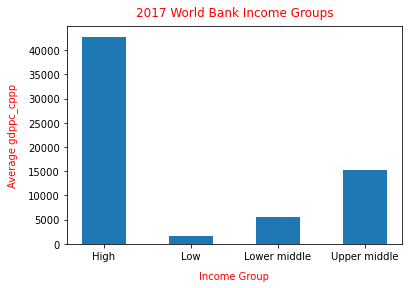

In [92]:
x = df.query('year == 2017').groupby('income_group').gdppc.mean().index
y = df.query('year == 2017').groupby('income_group').gdppc.mean().values
plt.bar(x, y, width=0.5)
plt.xlabel('Income Group', labelpad=10, color='red')
plt.ylabel('Average gdppc_cppp', labelpad=10, color='red')
plt.title('2017 World Bank Income Groups', fontdict={'color': 'red'}, pad=10);

#### Plotting a box plot `gdppc` for each of the 4 income groups to be more descriptive

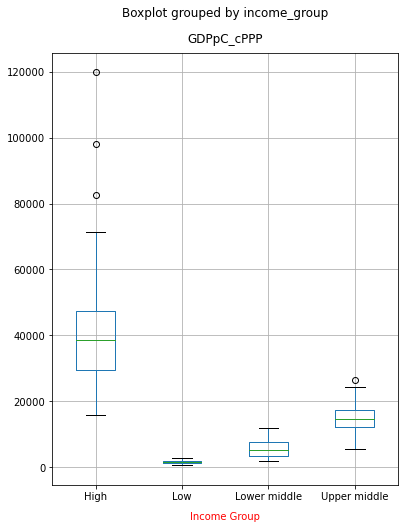

In [93]:
df.query('year == 2017').boxplot(column='gdppc', by='income_group', figsize=(6,8))
plt.xlabel('Income Group', labelpad=10, color='red')
plt.title('GDPpC_cPPP', pad=10);

#### Checking the proportion of each income group

In [94]:
df.income_group.value_counts(normalize=True) * 100

Lower middle    28.108108
High            27.567568
Upper middle    27.567568
Low             16.756757
Name: income_group, dtype: float64

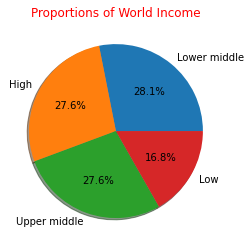

In [95]:
x = df.income_group.value_counts().values
i = df.income_group.value_counts().index
plt.pie(x, labels=i, autopct='%1.1f%%', shadow=True)
plt.title('Proportions of World Income', color='red');

#### Checking the proportion of each income group across different regions

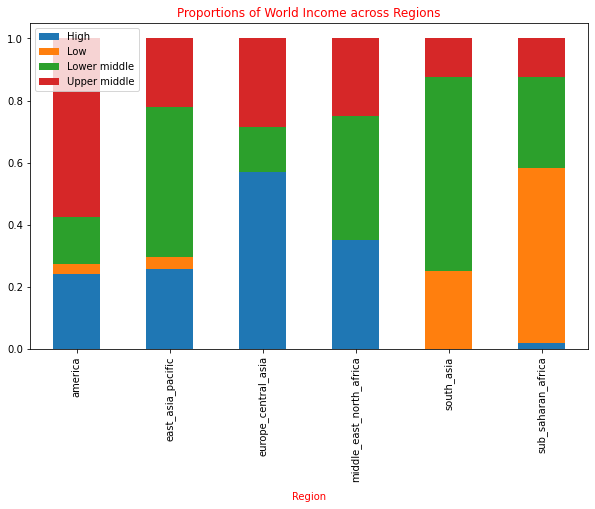

In [96]:
df.query('year==2017').groupby('region').income_group.value_counts(normalize=True).unstack().plot(kind='bar',figsize=(10,6),stacked=True)
plt.title('Proportions of World Income across Regions', color='red')
plt.xlabel('Region', labelpad=10, color='red')
plt.legend(loc='upper left');

##### Wealth Distribution
> - The pie chart shows the proprtion of each income group across the world, with almost even distribution of the four income groups.
> - The bar chart, however shows that these groups are not evenly distributed across the world ... e.g. Regions like Sub-Saharan Africa and South Asia have almost no High-Income countries and most of the Low-Income countries are located within these regions.

### 3.Q2. Is there a strong correlation between economical growth and human welfare?

##### Comparing Economic and Health Indicators

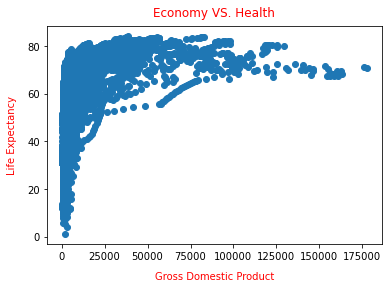

In [97]:
plt.scatter(x=df.gdppc,y=df.lex)
plt.xlabel('Gross Domestic Product', labelpad=10, color='red')
plt.ylabel('Life Expectancy', labelpad=10, color='red')
plt.title('Economy VS. Health', fontdict={'color': 'red'}, pad=10);

##### Comparing Economic and Knowledge Indicators

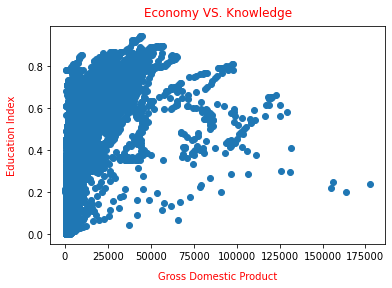

In [98]:
plt.scatter(x=df.gdppc,y=df.ed_index)
plt.xlabel('Gross Domestic Product', labelpad=10, color='red')
plt.ylabel('Education Index', labelpad=10, color='red')
plt.title('Economy VS. Knowledge', fontdict={'color': 'red'}, pad=10);

##### The two gaphs above show that:
> - economic development of a country necessarily reflects in the life expectency of its citizens, however low income countries can also have high life expcetency values
> - Contrary to popular opinion, there is no clear correlation between a country income, and the education level of its citizens. High Income countries can have low literacy rates, and vice versa.

### 3.3. Calculating HDI

The **Human Development Index `HDI`** is a summary measure of human development by measuring the average achievemtns in a country in three basic dimensions of human development; health `lex`, knowledge `ed_index`, and standard of living `gdppc`.

Calculation of the HDI is done according to _2007/2008 Human Development Report produced by the Human Development Report Office of the United Nations Development Programme (UNDP)_

To calculate HDI, an index is created for each of the indicators using minimum and maximum goalposts values for each, as following;

> Goalposts used for calculating the HDI
> - Life expectancy at birth (years); max. 85, min. 25
> - GDP per capita (PPP USD); max. 40,000, min. 100

> Indicator Index = (actual value - minimum value) / (maximum value - minimum value)

> HDI = Average of all three indices

In [99]:
# calculating the GDP index
df['gdp_index']=(np.log(df['gdppc'])-np.log(100))/(np.log(40000)-np.log(100))

In [100]:
# confirm changes
df

,country,region,income_group,year,gdppc,lex,ed_index,gdp_index
0,Afghanistan,south_asia,Low,1900,793.0,29.22,0.000667,0.345600
1,Afghanistan,south_asia,Low,1901,796.0,29.28,NaN,0.346231
2,Afghanistan,south_asia,Low,1902,798.0,29.33,NaN,0.346650
3,Afghanistan,south_asia,Low,1903,801.0,29.39,NaN,0.347276
4,Afghanistan,south_asia,Low,1904,804.0,29.45,NaN,0.347900
...,...,...,...,...,...,...,...,...
21825,South Sudan,sub_saharan_africa,Low,2013,1985.0,58.57,0.320000,0.498744
21826,South Sudan,sub_saharan_africa,Low,2014,1990.0,58.74,0.320000,0.499163
21827,South Sudan,sub_saharan_africa,Low,2015,1808.0,58.90,0.320000,0.483155
21828,South Sudan,sub_saharan_africa,Low,2016,1862.0,59.72,0.320000,0.488067


In [101]:
# calculating the life expectancy index
df['lex_index']=(df['lex']-25)/(85-25)

In [102]:
# confirm changes
df

,country,region,income_group,year,gdppc,lex,ed_index,gdp_index,lex_index
0,Afghanistan,south_asia,Low,1900,793.0,29.22,0.000667,0.345600,0.070333
1,Afghanistan,south_asia,Low,1901,796.0,29.28,NaN,0.346231,0.071333
2,Afghanistan,south_asia,Low,1902,798.0,29.33,NaN,0.346650,0.072167
3,Afghanistan,south_asia,Low,1903,801.0,29.39,NaN,0.347276,0.073167
4,Afghanistan,south_asia,Low,1904,804.0,29.45,NaN,0.347900,0.074167
...,...,...,...,...,...,...,...,...,...
21825,South Sudan,sub_saharan_africa,Low,2013,1985.0,58.57,0.320000,0.498744,0.559500
21826,South Sudan,sub_saharan_africa,Low,2014,1990.0,58.74,0.320000,0.499163,0.562333
21827,South Sudan,sub_saharan_africa,Low,2015,1808.0,58.90,0.320000,0.483155,0.565000
21828,South Sudan,sub_saharan_africa,Low,2016,1862.0,59.72,0.320000,0.488067,0.578667


In [103]:
# calculating HDI
df['HDI']=(df['lex_index'] + df['ed_index'] + df['gdp_index'])/3

In [104]:
# confirm changes
df

,country,region,income_group,year,gdppc,lex,ed_index,gdp_index,lex_index,HDI
0,Afghanistan,south_asia,Low,1900,793.0,29.22,0.000667,0.345600,0.070333,0.138867
1,Afghanistan,south_asia,Low,1901,796.0,29.28,NaN,0.346231,0.071333,NaN
2,Afghanistan,south_asia,Low,1902,798.0,29.33,NaN,0.346650,0.072167,NaN
3,Afghanistan,south_asia,Low,1903,801.0,29.39,NaN,0.347276,0.073167,NaN
4,Afghanistan,south_asia,Low,1904,804.0,29.45,NaN,0.347900,0.074167,NaN
...,...,...,...,...,...,...,...,...,...,...
21825,South Sudan,sub_saharan_africa,Low,2013,1985.0,58.57,0.320000,0.498744,0.559500,0.459415
21826,South Sudan,sub_saharan_africa,Low,2014,1990.0,58.74,0.320000,0.499163,0.562333,0.460499
21827,South Sudan,sub_saharan_africa,Low,2015,1808.0,58.90,0.320000,0.483155,0.565000,0.456052
21828,South Sudan,sub_saharan_africa,Low,2016,1862.0,59.72,0.320000,0.488067,0.578667,0.462245


### 3.Q3. Have certain regions of the world been growing during the past century better than others?

### 3.Q4. What are the key indicators reflecting on human development?

- To answer these two question, we will compare the mean values of each indicator over the years for each region

##### Economical Indicator Across Regions

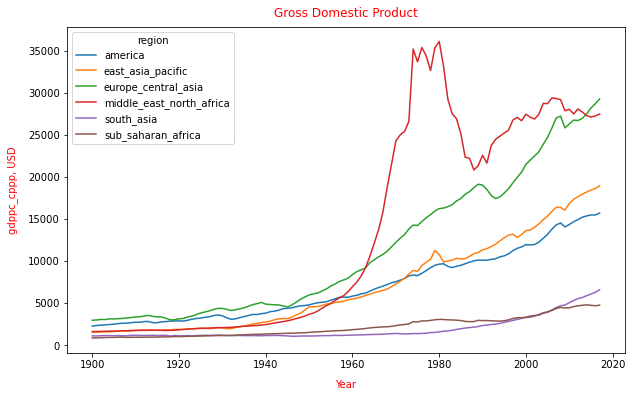

In [105]:
df.groupby(by=['year','region'])['gdppc'].mean().unstack().plot(figsize=(10,6))
plt.xlabel('Year', labelpad=10, color='red')
plt.ylabel('gdppc_cppp, USD', labelpad=10, color='red')
plt.title('Gross Domestic Product', fontdict={'color': 'red'}, pad=10);

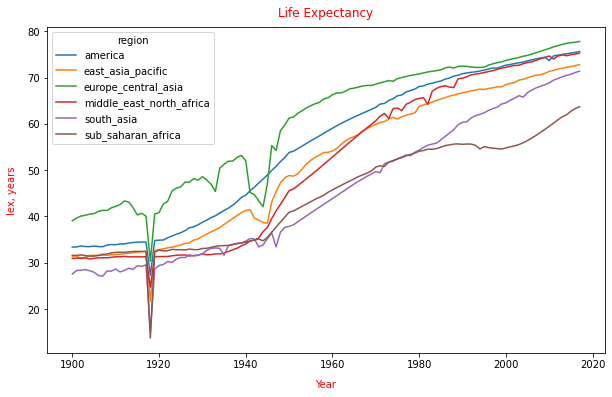

In [106]:
df.groupby(by=['year','region'])['lex'].mean().unstack().plot(figsize=(10,6))
plt.xlabel('Year', labelpad=10, color='red')
plt.ylabel('lex, years', labelpad=10, color='red')
plt.title('Life Expectancy', fontdict={'color': 'red'}, pad=10);

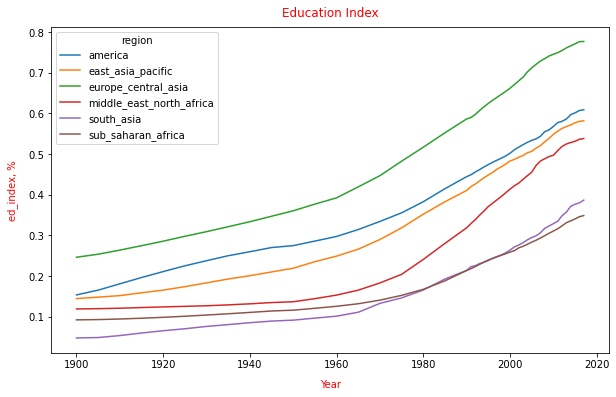

In [107]:
df.groupby(by=['year','region'])['ed_index'].mean().unstack().dropna().plot(figsize=(10,6))
plt.xlabel('Year', labelpad=10, color='red')
plt.ylabel('ed_index, %', labelpad=10, color='red')
plt.title('Education Index', fontdict={'color': 'red'}, pad=10);

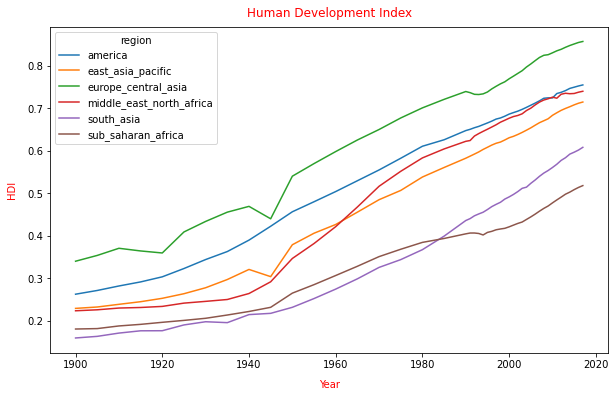

In [108]:
df.groupby(by=['year','region'])['HDI'].mean().unstack().dropna().plot(figsize=(10,6))
plt.xlabel('Year', labelpad=10, color='red')
plt.ylabel('HDI', labelpad=10, color='red')
plt.title('Human Development Index', fontdict={'color': 'red'}, pad=10);

**`GDPpC` Indicator**
> - **America** region shows steady development to over 15,000 USD-PPP currently
> - **East Asia Pacific** region shows steady development to over 15,000 USD-PPP currently
> - **Europe & Central Asia** region shows higher steady development to over 30,000 USD-PPP currently
> - **Middle East & North Africa** region shows fast development in the 60s reaching almost 35,000 USD-PPP, which is the highest until now, then a significant drop, then steady development to almost 30,000 USD-PPP currently.
> - **South Asia** region shows slow development to only 6,000 USD-PPP currently
> - **Sub Saharan Africa** region shows slow development to only 5,000 USD-PPP currently


**`lex` Indicator**
> - almost all regions show steady development to almost 70-80 years _life expectancy_ currently
> - Except for **Sub Saharan Africa** region, which shows unsteady development reaching almost 60 years currently

**`ed_index` Indicator**
> - Almost all regions show steady development in _Education Index_
> - **Europe & Central Asia** region shows the highest value of 0.8 currently
> - **America** and **East Asia Pacific** regions show similar development to almost 0.6 currently
> - **Middle East & North Africa** region shows steady development, somewhat faster than previous regions, but reaching only over 0.5 currently, which is lower than other regions
> - **South Asia** and **Sub Saharan Africa** regions show the lowest slow values of almost 0.35-0.4 currently

**`HDI` Indicator**
> - **Europe & Central Asia** region shows a very high _human development index_ of over 0.8
> - **America**, **Middle East & North Africa** and **East Asia Pacific** regions show high to medium _human development index_ ranging around 0.7
> - **South Asia** and **Sub Saharan Africa** regions show the lowest values of almost 0.5-0.6 currently

<a id='conclusions'></a>
## 5. Conclusions

### Analysis
- Analysis was made using the values of three development indicators for 185 countries over the past century (1900-2017)
- The three indicators used are representing economy, health, and knowledge development of a country.
- The countries were categorized into six geographical regions to be used for comparative analysis
- Human Development Index was calculated combining the three base indicators for further analysis

### Conclusions
The following conclusions can be fairly made from the analysis detailed above;

#### 1. The GDPpC associated with each of the four income groups
- We have accurately identified the statistical summary of the 4 income groups classified by the World Bank
- The distribution of the Gross Domestic Product across the world might seem even, as 55% of the world countries are considered to have High and Upper Middle Incomes and 45% Lower Middle and Low
- However, these income groups are not evenly distributed across the world. As there are regions like Sub-Saharan Africa and South Asia have almost no High-Income countries and most of the Low-Income countries are located within them.

#### 2. Correlations between economical growth and human welfare
Comparing Economic, Health and Knowledge Indicators concluded the following;
- There is a clear correlation between the economic development of a country and the life expectency of its citizens, however low income countries can also have high life expcetency values.
- Contrary to popular opinion, there is no clear correlation between a country income, and the education level of its citizens. High Income countries can have low literacy rates, and vice versa.

#### 3. Regional Comparison
comparing the mean values of each indicator over the years for each region, concluded the following;
##### Economical Development
- High : Europe & Central Asia and Middle East & North Africa
- Medium : Americas and East Asia Pacific
- Low : South Asia and Sub Saharan Africa <br>

##### Health Development
- High : Europe & Central Asia, Americas, Middle East & North Africa
- Medium : East Asia Pacific and South Asia 
- Low : Sub Saharan Africa <br>

##### Education Development
- Very High : Europe & Central Asia
- High : America and East Asia Pacific
- Medium : Middle East & North Africa
- Low : South Asia and Sub Saharan Africa

#### 4. Human Development Index
calculating the HDI and comparing the mean values across regions, concluded the following;
##### HDI cutoff points
- Very High : Europe & Central Asia
- High : America, Middle East & North Africa and East Asia Pacific
- Low : South Asia and Sub Saharan Africa

In general, certain regions of the world had higher development rates. Economic Development means increased standards of living and correlated to higher life expectancy, but does not necessarily reflect on citizens wellfare in terms of knowledge and education


### Limitations
The findings of this study have to be seen in light of some limitations;
- Historical data for the three indicator refers to countries in the past as if they always had the boundaries they have today.
- The base of analysis was done on the list of existing countries for which all three indicators have available data values, so 12 countries were dropped from the anlayis.
- Missing historical data for the education index were filled from the next avilable year for consolidation purposes, which typically resulted in higher values for education index in the past, but to an extent that does not alter the data overview.
- Calculation of the HDI was done based on the current goalposts values for the maximum and minimum for each of the three indicators. Historical data should have different goalposts values, which is not used, and the findings are drown only from recent HDI.